In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv(r'/content/healthcare-dataset-stroke-data.csv')

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.shape

(5110, 12)

In [7]:
data.describe(),data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


(                 id          age  ...          bmi       stroke
 count   5110.000000  5110.000000  ...  4909.000000  5110.000000
 mean   36517.829354    43.226614  ...    28.893237     0.048728
 std    21161.721625    22.612647  ...     7.854067     0.215320
 min       67.000000     0.080000  ...    10.300000     0.000000
 25%    17741.250000    25.000000  ...    23.500000     0.000000
 50%    36932.000000    45.000000  ...    28.100000     0.000000
 75%    54682.000000    61.000000  ...    33.100000     0.000000
 max    72940.000000    82.000000  ...    97.600000     1.000000
 
 [8 rows x 7 columns], None)

In [8]:
data.isnull().sum()/len(data)*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [9]:
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [10]:
data['bmi'].fillna((data['bmi'].mean()),inplace = True)

In [11]:
data.isnull().sum()/len(data)*100

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [16]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [13]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [20]:
data['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

# EDA

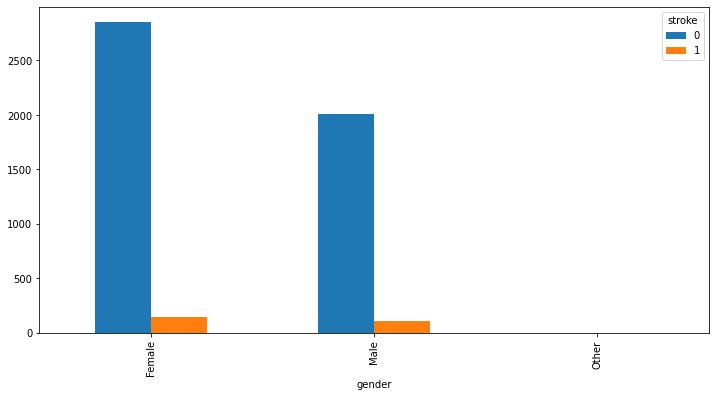

In [14]:
data.groupby(['gender', 'stroke']).size().unstack().plot(kind='bar', figsize=(12,6))

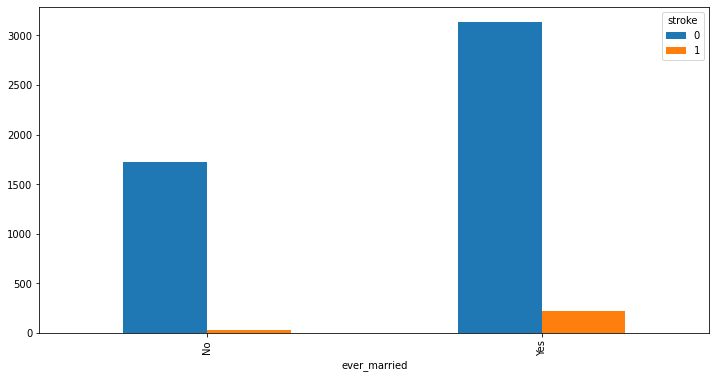

In [17]:
data.groupby(['ever_married', 'stroke']).size().unstack().plot(kind='bar', figsize=(12,6))

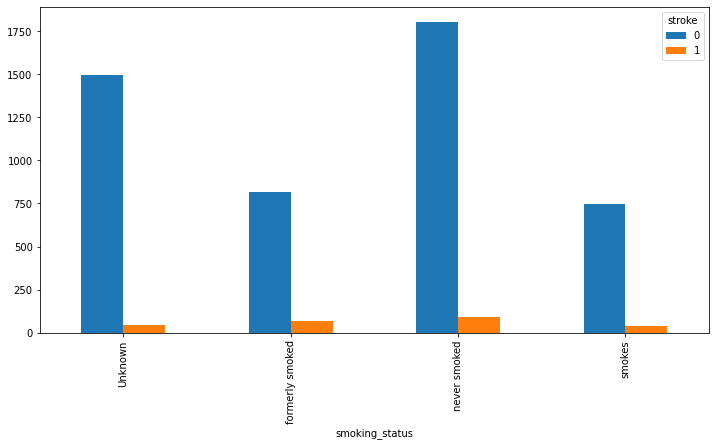

In [18]:
data.groupby(['smoking_status', 'stroke']).size().unstack().plot(kind='bar', figsize=(12,6))

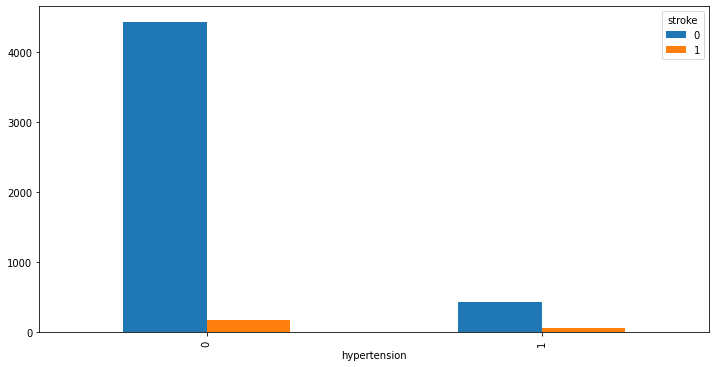

In [19]:
data.groupby(['hypertension', 'stroke']).size().unstack().plot(kind='bar', figsize=(12,6))

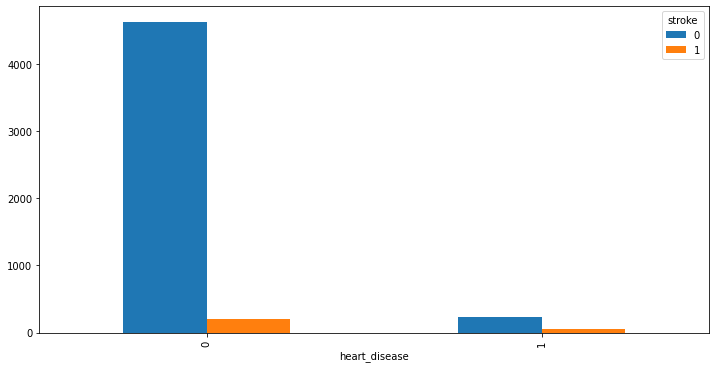

In [21]:
data.groupby(['heart_disease', 'stroke']).size().unstack().plot(kind='bar', figsize=(12,6))

In [22]:
data = pd.get_dummies(data, columns = ['gender','smoking_status'],prefix = '',prefix_sep = '')

In [25]:
data = data.drop(columns = ['ever_married','work_type','Residence_type'], axis =1)

In [26]:
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,Unknown,formerly smoked,never smoked,smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,0,0,1,0


In [28]:
data = data.drop(columns = ['id'], axis =1)

In [29]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,0,1,0


# outlie remove

In [30]:
def remove_outliers(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return upper_range,lower_range

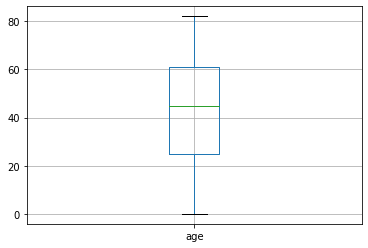

In [31]:
data.boxplot(column = ['age'])
plt.show()

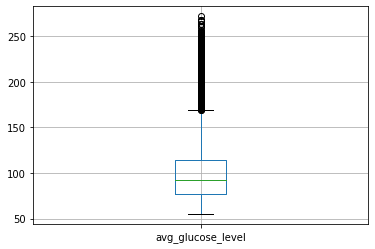

In [32]:
data.boxplot(column = ['avg_glucose_level'])
plt.show()

In [33]:
upper_bound,lower_bound = remove_outliers(data['avg_glucose_level'])
data['avg_glucose_level'] = np.where(data['avg_glucose_level']>=upper_bound,upper_bound,data['avg_glucose_level'])
data['avg_glucose_level'] = np.where(data['avg_glucose_level']<=lower_bound,lower_bound,data['avg_glucose_level'])

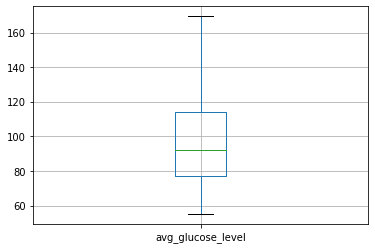

In [34]:
data.boxplot(column = ['avg_glucose_level'])
plt.show()

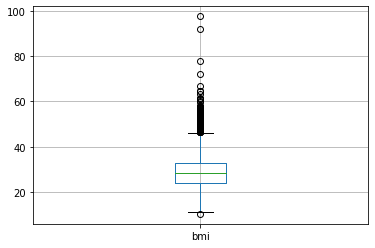

In [35]:
data.boxplot(column = ['bmi'])
plt.show()

In [36]:
upper_bound,lower_bound = remove_outliers(data['bmi'])
data['bmi'] = np.where(data['bmi']>=upper_bound,upper_bound,data['bmi'])
data['bmi'] = np.where(data['bmi']<=lower_bound,lower_bound,data['bmi'])

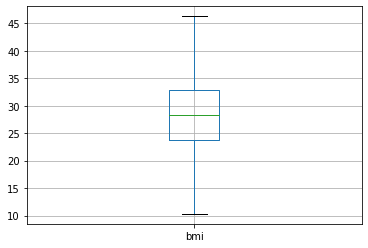

In [37]:
data.boxplot(column = ['bmi'])
plt.show()

In [41]:
X = data.drop('stroke',axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state= 101)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4088, 12)
(4088,)
(1022, 12)
(1022,)


# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
lRpredict = clf.predict(X_test)

In [46]:
print(accuracy_score(y_test,lRpredict))

0.9471624266144814


In [47]:
confusion_matrix(y_test,lRpredict)

array([[968,   0],
       [ 54,   0]])

In [48]:
print(classification_report(y_test,lRpredict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [49]:
Dic = DecisionTreeClassifier()

In [50]:
Dic.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
DTpredict = Dic.predict(X_test)

In [52]:
print(accuracy_score(y_test,DTpredict))

0.9070450097847358


In [53]:
confusion_matrix(y_test,DTpredict)

array([[920,  48],
       [ 47,   7]])

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
 model = RandomForestClassifier()

In [58]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
RFpredict = model.predict(X_test)

In [60]:
print(accuracy_score(y_test,RFpredict))

0.9432485322896281


In [61]:
confusion_matrix(y_test,RFpredict)

array([[963,   5],
       [ 53,   1]])

In [63]:
Dic.feature_importances_

array([0.22348747, 0.02445009, 0.028013  , 0.25155117, 0.29716977,
       0.02991527, 0.03948867, 0.        , 0.02118459, 0.04203991,
       0.02622372, 0.01647634])

In [64]:
X_train.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'Female', 'Male', 'Other', 'Unknown', 'formerly smoked', 'never smoked',
       'smokes'],
      dtype='object')

KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [67]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [68]:
KNN_pred=knn.predict(X_test)

In [69]:
accuracy_score(y_test,KNN_pred)

0.9442270058708415

In [70]:
confusion_matrix(y_test,KNN_pred)

array([[964,   4],
       [ 53,   1]])

SVM

In [71]:
from sklearn.svm import SVC

In [72]:
sv=SVC()

In [74]:
sv.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
SV_pred=sv.predict(X_test)

In [76]:
accuracy_score(y_test,SV_pred)

0.9471624266144814

In [77]:
confusion_matrix(y_test,SV_pred)

array([[968,   0],
       [ 54,   0]])